In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

In [4]:
sales = pd.read_csv(
        'sales.csv',
        parse_dates=['DATE'],
        delimiter = ';'
)

client = pd.read_csv(
        'client.csv',
        parse_dates=True,
        delimiter = ';'
)

sales_link = pd.read_csv(
        'sales_link.csv',
        parse_dates=True,
        delimiter = ';'
)

In [5]:
sales.head()

,ID,BRAND,TYPE,DATE,QUANTITY,PRICE_PER_1
0,60000,ACER,PC,2000-01-16,8,2490
1,60001,HP,PC,2000-01-21,3,5100
2,60002,HP,LAPTOP,2000-02-14,1,1100
3,60003,APPLE,LAPTOP,2000-02-23,4,4500
4,60004,ACER,PC,2000-02-25,6,2501


In [6]:
client.head()

,ID,FIRST NAME,LAST NAME,BIRTH DATE
0,200078567,NOEMI,NEWTON,6.03.1979
1,200078568,NORA,NEWMAN,3.12.1979
2,200078569,NICK,NORRIS,24.03.1982
3,200078570,NIKI,NEAL,5.12.1973
4,200078571,NICK,NOLAN,12.08.1987


In [6]:
sales_link.head()

,ID,SALE_ID,CLIENT_ID
0,700000,60000,200078599
1,700001,60001,200078629
2,700002,60002,200078645
3,700003,60003,200078582
4,700004,60004,200078581


In [7]:
client = client.rename(columns={'ID': 'CLIENT_ID'})
sales = sales.rename(columns={'ID': 'SALE_ID'})

In [8]:
merged = pd.merge(sales, sales_link, on='SALE_ID')
final = pd.merge(merged, client, on='CLIENT_ID')

In [9]:
quantity_by_client = final.groupby(['CLIENT_ID','FIRST NAME','LAST NAME'])['QUANTITY'].sum().reset_index()
quantity_by_client.sort_values('QUANTITY', ascending = False)

,CLIENT_ID,FIRST NAME,LAST NAME,QUANTITY
90,200078657,NICK,NICHOLS,115
25,200078592,NEHEMIAH,NORMAN,91
81,200078648,NIKOLAS,NICHOLSON,89
72,200078639,NAOMI,NICHOLS,88
57,200078624,NEHEMIAH,NASH,84
...,...,...,...,...
93,200078660,NAOMI,NICHOLS,19
78,200078645,NORA,NEAL,19
80,200078647,NIKI,NASH,18
18,200078585,NIKOLAS,NOLAN,15


In [10]:
final['PRICE_SALE'] = final['QUANTITY']*final['PRICE_PER_1']

In [11]:
final.head(5)

,SALE_ID,BRAND,TYPE,DATE,QUANTITY,PRICE_PER_1,ID,CLIENT_ID,FIRST NAME,LAST NAME,BIRTH DATE,PRICE_SALE
0,60000,ACER,PC,2000-01-16,8,2490,700000,200078599,NICO,NOLAN,29.08.1997,19920
1,60046,ACER,PC,2001-03-31,6,2783,700046,200078599,NICO,NOLAN,29.08.1997,16698
2,60093,ACER,PC,2002-05-05,5,3094,700093,200078599,NICO,NOLAN,29.08.1997,15470
3,60246,ACER,LAPTOP,2005-05-24,4,3320,700246,200078599,NICO,NOLAN,29.08.1997,13280
4,60267,HP,PC,2005-10-21,3,5100,700267,200078599,NICO,NOLAN,29.08.1997,15300


In [12]:
sales_by_client = final.groupby(['CLIENT_ID','FIRST NAME','LAST NAME'])['PRICE_SALE'].sum().reset_index()

In [13]:
sales_by_client = sales_by_client.sort_values('PRICE_SALE', ascending = False).reset_index(drop=True)

We can see that the CLIENT_ID, FIRST NAME AND LAST NAME that spended the most money is:
200078657, Nick Nichols. He also bought the most computers: 115

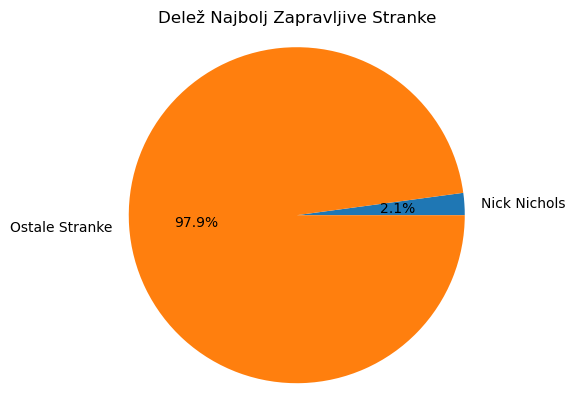

In [14]:
import warnings
warnings.filterwarnings('ignore')
first_val = sales_by_client.iloc[0]['PRICE_SALE']
other_sum = sales_by_client['PRICE_SALE'][1:].sum()
labels = ['Nick Nichols', 'Ostale Stranke']
values = [first_val, other_sum]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Delež Najbolj Zapravljive Stranke')
plt.show()

In [15]:
final['YEAR'] = final['DATE'].dt.year

In [16]:
sales_by_year = final.groupby(['YEAR'])['PRICE_SALE'].sum().reset_index()
sales_by_year.sort_values('PRICE_SALE', ascending = False).reset_index(drop=True)

,YEAR,PRICE_SALE
0,2019,1394500
1,2016,1261650
2,2018,1225321
3,2017,1203412
4,2013,1057849
5,2014,1045577
6,2006,966135
7,2012,949796
8,2015,926321
9,2011,894470


In [17]:
purchases = pd.read_csv(
        'purchases.csv',
        parse_dates=['DATE'],
        delimiter = ';'
)

seller = pd.read_csv(
        'seller.csv',
        parse_dates=True,
        delimiter = ';'
)

seller_link = pd.read_csv(
        'seller_link.csv',
        parse_dates=True,
        delimiter = ';'
)

In [18]:
purchases.head()

,ID,BRAND,TYPE,DATE,QUANTITY,PRICE PER 1
0,50000000,HP,PC,2000-01-01,3,4597
1,50000001,ACER,PC,2000-01-01,9,1500
2,50000002,APPLE,LAPTOP,2000-04-01,3,4000
3,50000003,HP,LAPTOP,2000-01-15,1,1000
4,50000004,ASUS,LAPTOP,2000-04-02,3,2000


In [19]:
seller.head()

,ID,NAME
0,100000,Random seller 1
1,100001,Random seller 2
2,100002,Random seller 3
3,100003,Random seller 4
4,100004,Random seller 5


In [20]:
seller_link.head()

,ID,SELLER ID,PURCHASE ID
0,400023567,100042,50000000
1,400023568,100064,50000001
2,400023569,100005,50000002
3,400023570,100011,50000003
4,400023571,100019,50000004


In [21]:
seller = seller.rename(columns={'ID': 'SELLER ID'})
purchases = purchases.rename(columns={'ID': 'PURCHASE ID'})
merged1 = pd.merge(purchases, seller_link, on='PURCHASE ID')
buying = pd.merge(merged1, seller, on='SELLER ID')
buying

,PURCHASE ID,BRAND,TYPE,DATE,QUANTITY,PRICE PER 1,ID,SELLER ID,NAME
0,50000000,HP,PC,2000-01-01,3,4597,400023567,100042,Random seller 43
1,50000054,APPLE,LAPTOP,2001-05-18,3,4031,400023621,100042,Random seller 43
2,50000253,HP,PC,2005-03-06,2,4546,400023820,100042,Random seller 43
3,50000377,MSI,LAPTOP,2007-08-10,2,2039,400023944,100042,Random seller 43
4,50000383,ACER,PC,2007-11-20,7,4676,400023950,100042,Random seller 43
...,...,...,...,...,...,...,...,...,...
1076,50000567,ASUS,LAPTOP,2011-07-04,1,2311,400024134,100003,Random seller 4
1077,50000705,ASUS,LAPTOP,2013-03-09,4,3762,400024272,100003,Random seller 4
1078,50000877,ACER,LAPTOP,2016-11-07,8,2577,400024444,100003,Random seller 4
1079,50000983,MSI,LAPTOP,2018-04-13,7,2839,400024550,100003,Random seller 4


In [22]:
buying['PRICE_PURCHASE'] = buying['QUANTITY']*buying['PRICE PER 1']

In [23]:
buying['YEAR'] = buying['DATE'].dt.year
buying

,PURCHASE ID,BRAND,TYPE,DATE,QUANTITY,PRICE PER 1,ID,SELLER ID,NAME,PRICE_PURCHASE,YEAR
0,50000000,HP,PC,2000-01-01,3,4597,400023567,100042,Random seller 43,13791,2000
1,50000054,APPLE,LAPTOP,2001-05-18,3,4031,400023621,100042,Random seller 43,12093,2001
2,50000253,HP,PC,2005-03-06,2,4546,400023820,100042,Random seller 43,9092,2005
3,50000377,MSI,LAPTOP,2007-08-10,2,2039,400023944,100042,Random seller 43,4078,2007
4,50000383,ACER,PC,2007-11-20,7,4676,400023950,100042,Random seller 43,32732,2007
...,...,...,...,...,...,...,...,...,...,...,...
1076,50000567,ASUS,LAPTOP,2011-07-04,1,2311,400024134,100003,Random seller 4,2311,2011
1077,50000705,ASUS,LAPTOP,2013-03-09,4,3762,400024272,100003,Random seller 4,15048,2013
1078,50000877,ACER,LAPTOP,2016-11-07,8,2577,400024444,100003,Random seller 4,20616,2016
1079,50000983,MSI,LAPTOP,2018-04-13,7,2839,400024550,100003,Random seller 4,19873,2018


In [24]:
purchase_by_year = buying.groupby(['YEAR'])['PRICE_PURCHASE'].sum().reset_index()
purchase_by_year.sort_values('PRICE_PURCHASE', ascending = False).reset_index(drop=True)

,YEAR,PRICE_PURCHASE
0,2018,1401666
1,2017,1279669
2,2016,1225486
3,2019,1207246
4,2015,1081078
5,2013,1038841
6,2014,995559
7,2006,926454
8,2012,910477
9,2009,909239


In [25]:
profit = pd.merge(sales_by_year,purchase_by_year, on='YEAR')
year_2020 = {'YEAR': 2020, 'PRICE_SALE': 161633, 'PRICE_PURCHASE': 0}
profit.loc[len(profit)] = year_2020
profit['PROFIT'] = profit['PRICE_SALE']-profit['PRICE_PURCHASE']
profit = profit.sort_values('PROFIT', ascending = False).reset_index(drop=True)

We can see that there is no purchases made in 2020, so PROFIT = SALES. After checking the data, there are also only 
4 sales in 2020.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2019'),
  Text(1, 0, '2020'),
  Text(2, 0, '2003'),
  Text(3, 0, '2014'),
  Text(4, 0, '2005')])

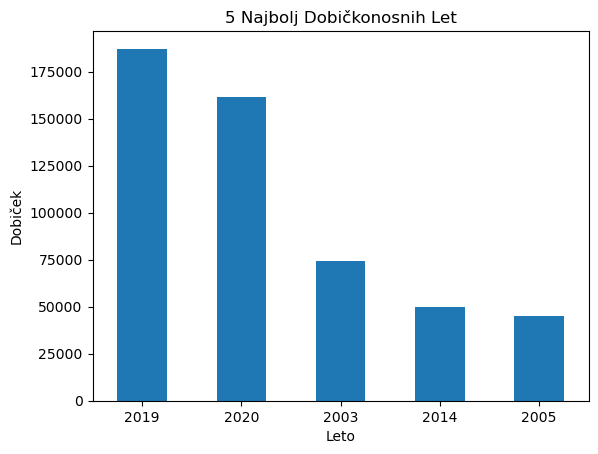

In [26]:
ax = profit.head(5).plot.bar(x='YEAR', y='PROFIT',xlabel = 'Leto',ylabel='Dobiček',legend=False, title='5 Najbolj Dobičkonosnih Let')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2001'),
  Text(1, 0, '2017'),
  Text(2, 0, '2015'),
  Text(3, 0, '2018'),
  Text(4, 0, '2009')])

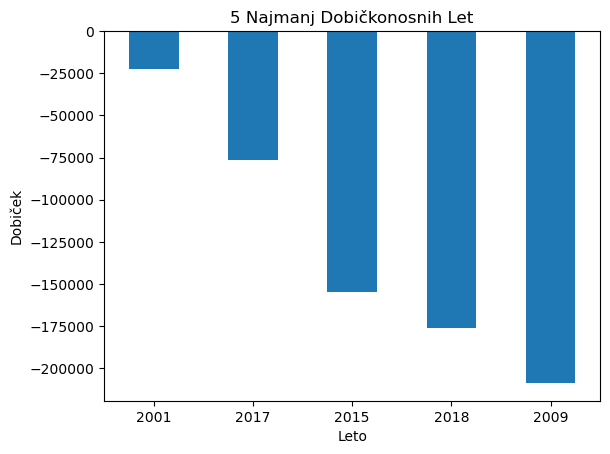

In [27]:
ax = profit.tail(5).plot.bar(x='YEAR', y='PROFIT',xlabel = 'Leto',ylabel='Dobiček',legend=False, title='5 Najmanj Dobičkonosnih Let')
plt.xticks(rotation=0)

In [28]:
finalquantity = final.sort_values('QUANTITY', ascending = True).reset_index(drop=True)
finalquantity.head(30)

,SALE_ID,BRAND,TYPE,DATE,QUANTITY,PRICE_PER_1,ID,CLIENT_ID,FIRST NAME,LAST NAME,BIRTH DATE,PRICE_SALE,YEAR
0,60431,ASUS,LAPTOP,2008-11-28,-1,3062,700431,200078600,NOEMI,NEAL,26.07.1998,-3062,2008
1,60028,ASUS,LAPTOP,2000-11-10,-1,2529,700028,200078581,NOEMI,NEAL,6.04.1992,-2529,2000
2,60190,ASUS,LAPTOP,2004-03-05,-1,3006,700190,200078567,NOEMI,NEWTON,6.03.1979,-3006,2004
3,60937,ASUS,LAPTOP,2017-06-09,-1,5828,700937,200078597,NIKI,NICHOLS,29.10.1984,-5828,2017
4,60444,ASUS,LAPTOP,2009-02-21,-1,3138,700444,200078602,NAOMI,NORRIS,12.03.1988,-3138,2009
5,60486,ASUS,LAPTOP,2009-12-23,-1,2903,700486,200078597,NIKI,NICHOLS,29.10.1984,-2903,2009
6,60305,ASUS,LAPTOP,2006-05-07,-1,2629,700305,200078650,NIKLAS,NICHOLSON,7.10.1989,-2629,2006
7,60818,ASUS,LAPTOP,2015-09-16,-1,4829,700818,200078650,NIKLAS,NICHOLSON,7.10.1989,-4829,2015
8,60387,ASUS,LAPTOP,2008-01-15,-1,3187,700387,200078597,NIKI,NICHOLS,29.10.1984,-3187,2008
9,60268,ASUS,LAPTOP,2005-10-25,-1,3115,700268,200078658,NICO,NORMAN,2.03.1994,-3115,2005


In [29]:
sales_quantity_by_brand = final.groupby(['BRAND'])['QUANTITY'].sum().reset_index()
sales_quantity_by_brand['BRAND'] = sales_quantity_by_brand['BRAND'].str.replace(' ','')
sales_quantity_by_brand = sales_quantity_by_brand.groupby(['BRAND'])['QUANTITY'].sum().reset_index()
sales_quantity_by_brand

,BRAND,QUANTITY
0,ACER,2121
1,APPLE,450
2,ASUS,578
3,HP,923
4,MSI,878


In [50]:
purchase_quantity_by_brand = buying.groupby(['BRAND'])['QUANTITY'].sum().reset_index()
purchase_quantity_by_brand['BRAND'] = purchase_quantity_by_brand['BRAND'].str.replace(' ','')
purchase_quantity_by_brand = purchase_quantity_by_brand.groupby(['BRAND'])['QUANTITY'].sum().reset_index()
purchase_quantity_by_brand

,BRAND,QUANTITY
0,ACER,2209
1,APPLE,445
2,ASUS,744
3,HP,1153
4,MSI,929


In [51]:
purchase_quantity_by_brand = purchase_quantity_by_brand.rename(columns={'QUANTITY': 'QUANTITYP'})
quantity_stock = pd.merge(purchase_quantity_by_brand, sales_quantity_by_brand, on='BRAND')
quantity_stock['STOCK_BY_BRAND'] = quantity_stock['QUANTITYP'] - quantity_stock['QUANTITY']
quantity_stock

,BRAND,QUANTITYP,QUANTITY,STOCK_BY_BRAND
0,ACER,2209,2121,88
1,APPLE,445,450,-5
2,ASUS,744,578,166
3,HP,1153,923,230
4,MSI,929,878,51


In [53]:
buying['BRAND']=buying['BRAND'].str.replace(' ','')
avg_purchase_price_by_brand = buying.groupby(['BRAND'])['PRICE PER 1'].mean().round().reset_index()
avg_purchase_price_by_brand['BRAND'] = avg_purchase_price_by_brand['BRAND'].str.replace(' ','')
product_price_stock = pd.merge(quantity_stock, avg_purchase_price_by_brand, on='BRAND')
product_price_stock['VALUE IN STOCK'] = product_price_stock['STOCK_BY_BRAND'] * product_price_stock['PRICE PER 1']
product_price_stock

,BRAND,QUANTITYP,QUANTITY,STOCK_BY_BRAND,PRICE PER 1,VALUE IN STOCK
0,ACER,2209,2121,88,5139.0,452232.0
1,APPLE,445,450,-5,4432.0,-22160.0
2,ASUS,744,578,166,3829.0,635614.0
3,HP,1153,923,230,3681.0,846630.0
4,MSI,929,878,51,2511.0,128061.0


<AxesSubplot: title={'center': 'Trend Nakupov MSI(PC)'}, xlabel='Leto', ylabel='Vrednost Nakupov'>

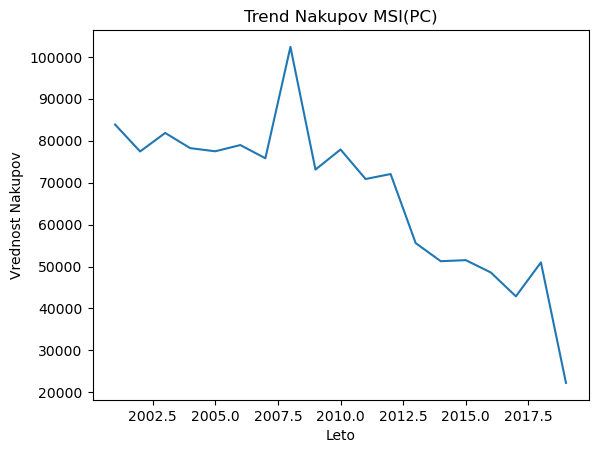

In [54]:
buying['BRAND'] = buying['BRAND'].str.replace(' ','')
msipctrendbuying = buying.loc[(buying['BRAND']=='MSI') & (buying['TYPE']=='PC')]
msipctrendbuying = msipctrendbuying.groupby(['YEAR'])['PRICE_PURCHASE'].sum().reset_index()
msipctrendbuying.plot(y='PRICE_PURCHASE',x='YEAR',xlabel='Leto',ylabel='Vrednost Nakupov',title = 'Trend Nakupov MSI(PC)', legend = False)

<AxesSubplot: title={'center': 'Trend Prodaje MSI(PC)'}, xlabel='Leto', ylabel='Vrednost Prodaje'>

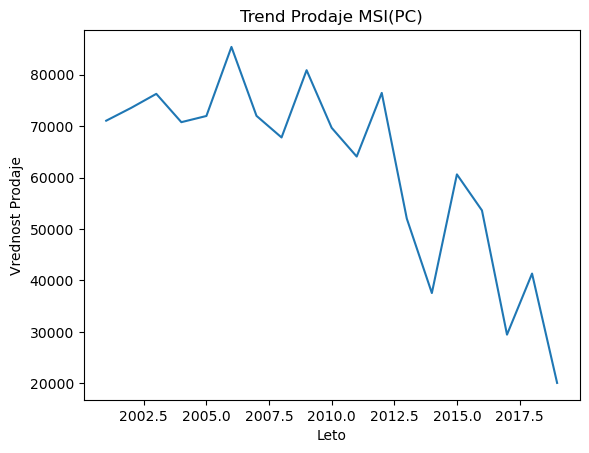

In [55]:
final['BRAND'] = final['BRAND'].str.replace(' ','')
msipctrendselling = final.loc[(final['BRAND']=='MSI') & (final['TYPE']=='PC')]
msipctrendselling = msipctrendselling.groupby(['YEAR'])['PRICE_SALE'].sum().reset_index()
msipctrendselling.plot(y='PRICE_SALE',x='YEAR',xlabel='Leto',ylabel='Vrednost Prodaje', title = 'Trend Prodaje MSI(PC)', legend = False)

In [56]:
msipcquantitybuy= buying.loc[(buying['BRAND']=='MSI') & (buying['TYPE']=='PC')]
msipcquantitybuy = msipcquantitybuy['QUANTITY'].sum()
msipcquantitybuy

477

In [57]:
msipcquantitysold= final.loc[(final['BRAND']=='MSI') & (final['TYPE']=='PC')]
msipcquantitysold = msipcquantitysold['QUANTITY'].sum()
msipcquantitysold

433

After checking the number of MSI(PC) bought and sold. The company has 44 computer of that kind in stock.

In [58]:
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [130]:
hppctrend = final.loc[(final['BRAND']=='HP') & (final['TYPE']=='PC')].sort_values('DATE')
df = hppctrend.set_index('DATE')
ts = df['PRICE_SALE']
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)
forecast.round().sum()

C:\Users\rokzu\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rokzu\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rokzu\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rokzu\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


87306.0

In [59]:
acerpctrend= final.loc[(final['BRAND']=='ACER') & (final['TYPE']=='PC')].sort_values('DATE')
df1 = acerpctrend.set_index('DATE')
ts1 = df1['PRICE_SALE']
model = ARIMA(ts1, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)
forecast.round().sum()

C:\Users\rokzu\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rokzu\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rokzu\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rokzu\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


260876.0

In [60]:
predictasuspc = buying.loc[(buying['BRAND']=='ASUS') & (buying['TYPE']=='LAPTOP')].sort_values('DATE')
df2 = predictasuspc.set_index('DATE')
ts2 = df2['PRICE PER 1']
model = ARIMA(ts2, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
forecast.mean().round()

C:\Users\rokzu\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rokzu\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rokzu\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rokzu\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


5458.0